# A Semi-automatic Classification of Normal Karyotypes using Convolutional Neural Network Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

## Modules

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Samples


## Load the Datasets

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
path = '/content/drive/My Drive/KaryoConvolution/'

Mounted at /content/drive


In [ ]:
X_train = np.load(path + 'X_train_2D_KaryoLearning_Abnormal.npy')
y_train = np.load(path + 'y_train_2D_KaryoLearning_Abnormal.npy')

X_test = np.load(path + 'X_test_2D_KaryoLearning_Abnormal.npy')
y_test = np.load(path + 'y_test_2D_KaryoLearning_Abnormal.npy')

## Convolutional Neural Network

## Data Preparation

In [ ]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### Training

#### Modal

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(Flatten())
model.add(Dense(700, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(32, activation='softmax'))

#### Tensorboard Initilization

In [ ]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = [keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)]

#### Compile the modal

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training

#### Save the best performance Model

In [ ]:
EPOCHS = 500
checkpoint_filepath = './checkpoint'

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.

### Fitting

In [ ]:
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback, model_checkpoint_callback])

Epoch 1/500
26/26 [==============================] - 15s 272ms/step - loss: 869.9019 - accuracy: 0.0445 - val_loss: 3.3864 - val_accuracy: 0.2571
Epoch 2/500
26/26 [==============================] - 6s 212ms/step - loss: 2.7987 - accuracy: 0.3844 - val_loss: 1.4712 - val_accuracy: 0.6254
Epoch 3/500
26/26 [==============================] - 6s 214ms/step - loss: 0.6146 - accuracy: 0.8060 - val_loss: 1.1289 - val_accuracy: 0.7270
Epoch 4/500
26/26 [==============================] - 6s 218ms/step - loss: 0.2269 - accuracy: 0.9180 - val_loss: 1.0663 - val_accuracy: 0.7651
Epoch 5/500
26/26 [==============================] - 6s 214ms/step - loss: 0.1327 - accuracy: 0.9683 - val_loss: 0.9468 - val_accuracy: 0.7905
Epoch 6/500
26/26 [==============================] - 6s 215ms/step - loss: 0.0684 - accuracy: 0.9804 - val_loss: 1.1270 - val_accuracy: 0.7937
Epoch 7/500
26/26 [==============================] - 6s 215ms/step - loss: 0.0388 - accuracy: 0.9897 - val_loss: 1.0374 - val_accuracy: 0.7

In [ ]:
model.summary()

### Tensorboard Display

In [ ]:
%tensorboard --logdir logs/fit

### Load the best model

In [ ]:
#model.load_weights()

## Performance Measures

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

In [ ]:
len(X_test)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
len(y_predict)

In [ ]:
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [ ]:
len(y_predict_filtered)

In [ ]:
len(y_test)

### Confusion Matrix (混淆矩阵)

In [ ]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
                }

In [ ]:
number_label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 0, 23, 24, 25, 26, 27, 28, 29,30, 31]
text_label = ['chr_01', 
               'chr_02', 
               'chr_03', 
               'chr_04', 
               'chr_05', 
               'chr_06', 
               'chr_07', 
               'chr_08', 
               'chr_09', 
               'chr_10', 
               'chr_11', 
               'chr_12', 
               'chr_13', 
               'chr_14', 
               'chr_15', 
               'chr_16', 
               'chr_17', 
               'chr_18', 
               'chr_19', 
               'chr_20', 
               'chr_21', 
               'chr_22', 
               'chr_x', 
               'chr_y', 
                'chr_18_p11_deletion',
                'chr_18_q10_isochromosome',
                'chr_9_inversion',
                'chr_5_p14_deletion',
                'chr_x_isochromosome',
                'chr_x_p22_cnv', 
                'chr_x_q21_cnv',
                'chr_x_q22_deletion']

In [ ]:
predicted_text_label = []
for item in text_label:
  predicted_text_label.append('predicted ' + item)

In [ ]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=number_label))
confusion = pd.DataFrame(cm, index=text_label,
                        columns=predicted_text_label)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

In [ ]:
print(classification_report(y_test, y_predict_filtered, target_names=text_label))

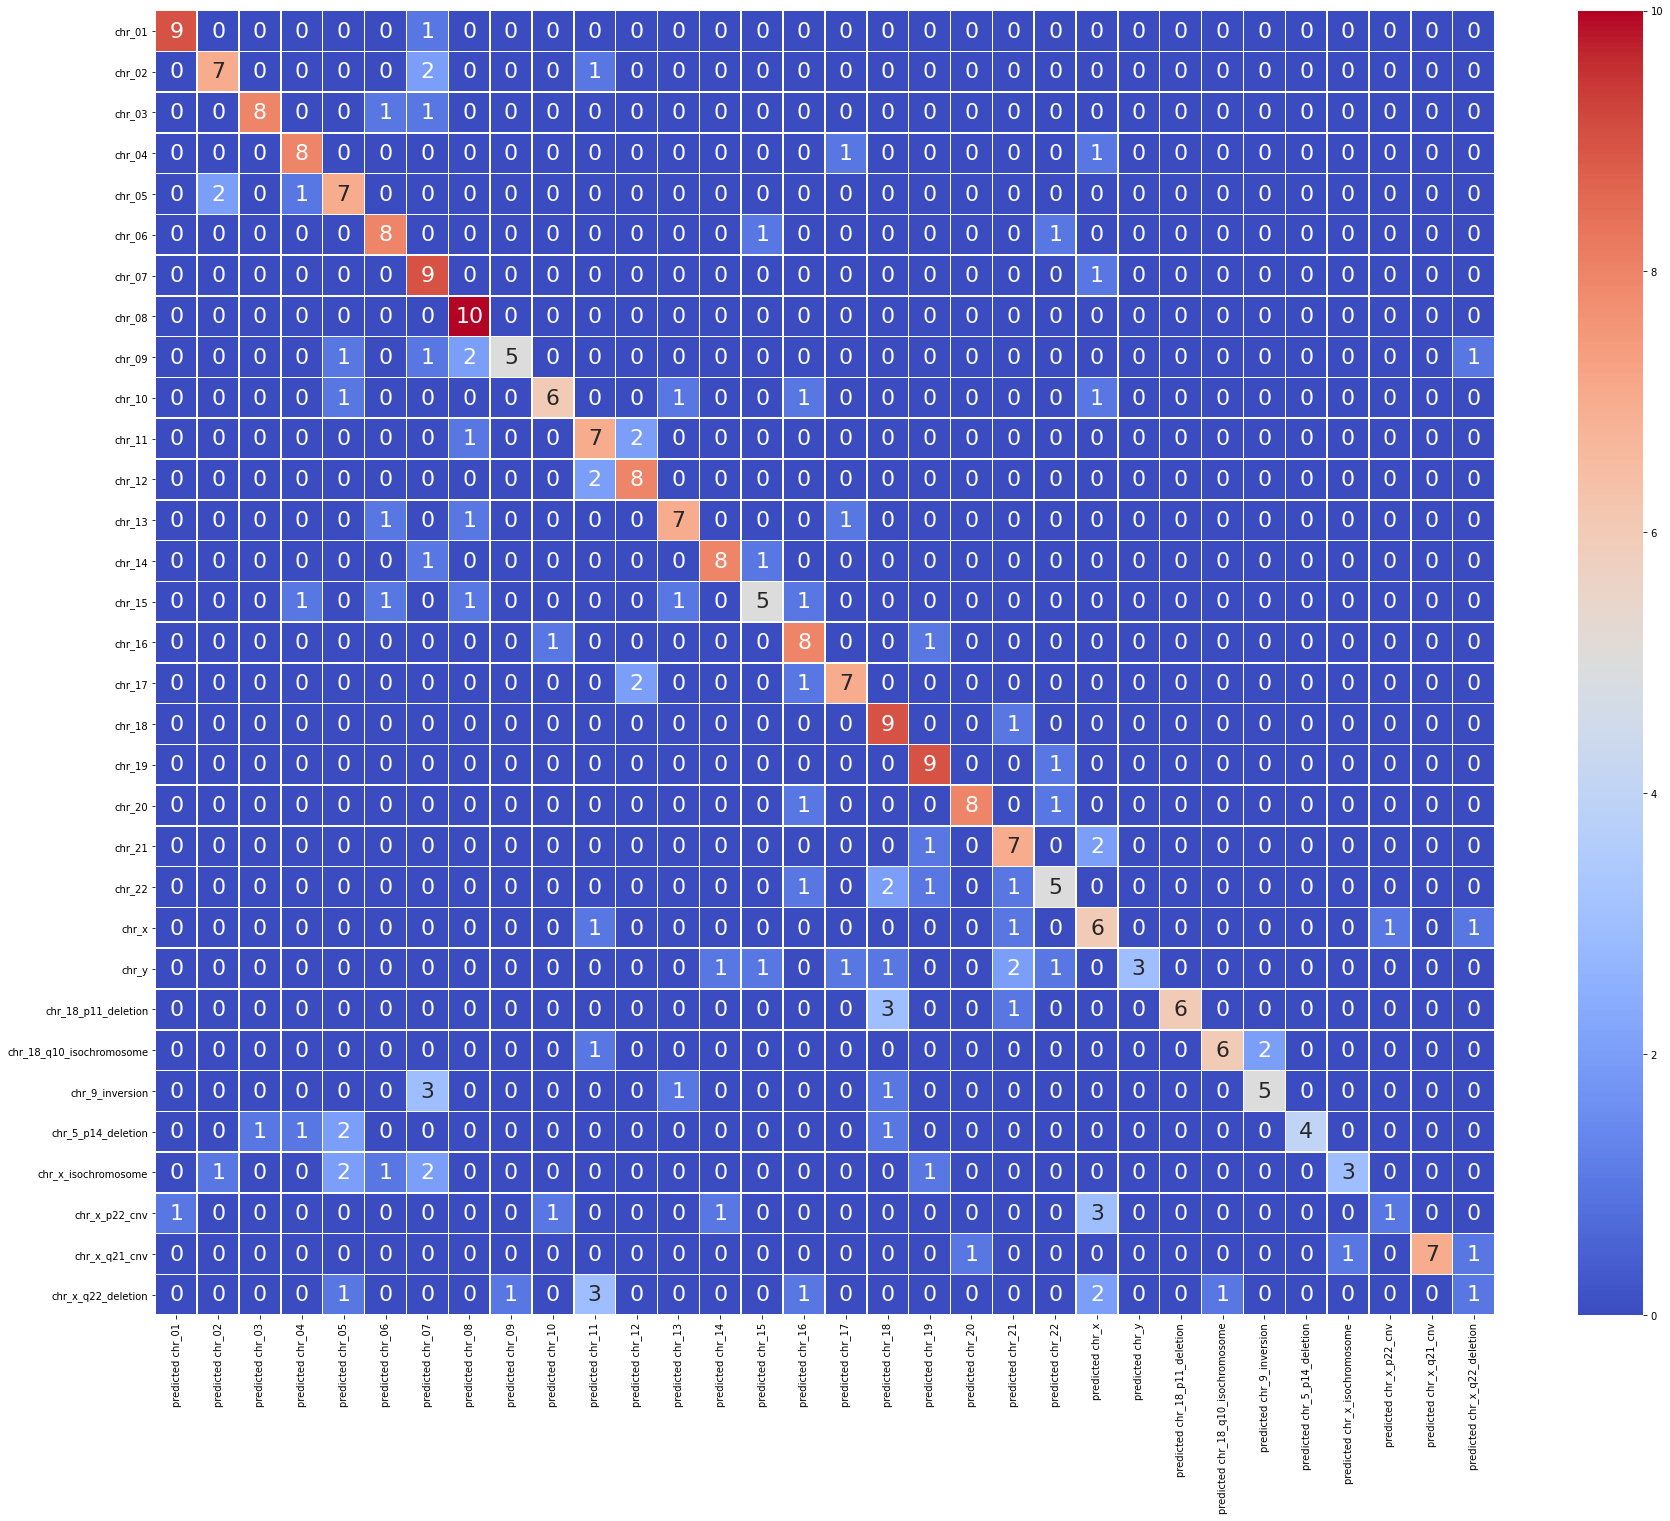

In [ ]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 22})
sb.set(font_scale = 2)

## Frequencies

In [ ]:
len(y_train)

1653

In [ ]:
import pandas

In [ ]:
pd.Series(y_train).value_counts()

0     103
18     98
9      97
5      79
1      63
8      61
14     60
2      60
3      60
4      60
6      60
7      60
10     60
11     60
13     60
15     60
17     60
19     60
20     60
22     60
16     59
12     59
21     58
31     31
28     29
23     19
26     12
24     10
27     10
30      9
25      9
29      7
dtype: int64

In [ ]:
chromConvertReverse = {}
for i in range(32):
  chromConvertReverse[number_label[i]] = text_label[i]


In [ ]:
y_train_text = []

for item in y_train:
  y_train_text.append(chromConvertReverse[item])

len(y_train_text)

In [ ]:
frequency = pd.Series(y_train_text).value_counts()

In [ ]:
frequency

In [ ]:
y_test_text = []

for item in y_test:
  y_test_text.append(chromConvertReverse[item])

len(y_test_text)

In [ ]:
frequency_test = pd.Series(y_test_text).value_counts()
frequency_test